In [17]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedrugDF = pd.read_csv(mouse_drug_data_to_load)
clinicaltrialDF = pd.read_csv(clinical_trial_data_to_load)


mousedrugDF = mousedrugDF.drop_duplicates(subset = 'Mouse ID', keep = False)
# Combine the data into a single dataset

TrialsDF = pd.merge(clinicaltrialDF, mousedrugDF, how = "left", on = ["Mouse ID"])

# Display the data table for preview
TrialsDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [18]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorvolumedata = TrialsDF.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumorvolumedata = pd.DataFrame(tumorvolumedata).reset_index()

In [19]:
# Preview DataFrame
tumorvolumedata.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [20]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderr_tumor_volumes = TrialsDF.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
stderr_tumor_volumes = pd.DataFrame(stderr_tumor_volumes ).reset_index()

In [21]:
# Preview DataFrame
stderr_tumor_volumes.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [22]:
# Minor Data Munging to Re-Format the Data Frames
size_vs_time = tumorvolumedata.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)') * 100
std_err_vs_time = stderr_tumor_volumes.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)') * 100

# Preview that Reformatting worked
std_err_vs_time .head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,44.859285,16.450481,23.510230,26.481852,20.238536,21.809078,24.184165,48.295547,25.483026,18.895032
10,70.268437,23.614441,28.234591,35.742126,31.941506,40.206381,38.870069,72.022465,46.147353,26.394944
15,83.861725,33.205282,35.770500,58.026797,44.437784,61.446144,50.202378,77.043218,53.290416,37.054441
20,90.973069,35.948240,47.620951,72.648382,59.526019,83.960917,60.741154,78.619947,68.467024,53.318230


No handles with labels found to put in legend.


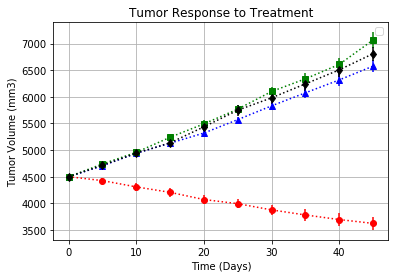

In [23]:
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plot_directory = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

# Generate the Plot (with Error Bars)

fig1, ax1 = plt.subplots()
for drug in drugs:
    ax1.errorbar(size_vs_time.index, size_vs_time[drug], std_err_vs_time[drug], fmt = plot_directory[drug])
ax1.legend()
plt.grid(True)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save the Figure

plt.savefig("TumorResponseToTreatment.png")
plt.show()

In [24]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_sites_info = TrialsDF.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()
# Convert to DataFrame
metastatic_sites_info  = pd.DataFrame(metastatic_sites_info).reset_index()

In [25]:
# Preview DataFrame
metastatic_sites_info.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [26]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderr_metastatic_sites = TrialsDF.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()
# Convert to DataFrame
stderr_metastatic_sites = pd.DataFrame(stderr_metastatic_sites).reset_index()

In [27]:
# Preview DataFrame
stderr_metastatic_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [28]:
# Minor Data Munging to Re-Format the Data Frames
metastaticsites_vs_time = metastatic_sites_info .pivot(index='Timepoint', columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
metastaticsites_vs_time.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


KeyError: 'Capomulin'

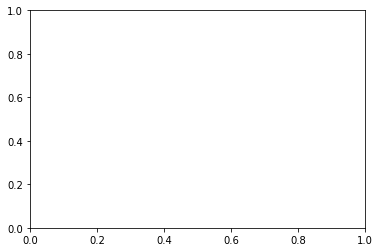

In [29]:
# Generate the Plot (with Error Bars)
fig2, ax2 = plt.subplots()
for drug in drugs:
    ax2.errorbar(metastaticsites_vs_time.index, metastaticsites_vs_time[drug],
             stderr_metastatic_sites[drug], fmt=plot_directory[drug])

ax2.legend()
plt.grid(True)
plt.title('Metastatic Spread during Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')

# Save the Figure

plt.savefig("MetastaticSpreadDuringTreatment.png")
# Show the Figure
plt.show